In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
df = pd.read_csv("ld_cases_by_county.csv", encoding='latin-1')
df.columns = list(df.columns[0:4]) + list(np.arange(2000, 2017))
df

,Ctyname,Stname,STCODE,CTYCODE,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Alabama,Alabama,1,999,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Autauga County,Alabama,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,Baldwin County,Alabama,1,3,1,0,1,0,0,0,...,0,0,1,0,1,1,0,3,1,2
3,Barbour County,Alabama,1,5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Bibb County,Alabama,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,Blount County,Alabama,1,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,Bullock County,Alabama,1,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Butler County,Alabama,1,13,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,Calhoun County,Alabama,1,15,0,0,0,0,0,0,...,1,0,0,0,2,1,3,2,0,1
9,Chambers County,Alabama,1,17,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0


In [3]:
total_by_yr = DataFrame(index=np.arange(2), columns=np.arange(2000, 2017))
for i in np.arange(2000, 2017):
    total_by_yr.loc[0, i] = df.loc[:, i].sum()
for j in np.arange(2001, 2017):
    total_by_yr.loc[1, j] = (total_by_yr.loc[0, j] - total_by_yr.loc[0, j-1]) / total_by_yr.loc[0, j-1]
total_by_yr.loc[1, 2000] = 0
total_by_yr.index = ['total', 'variation']
total_by_yr

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
total,17730,17029,23763,21273,19804,23305,19931,27444,35198,38468,30158,33097,30831,36307,33461,38069,36429
variation,0,-0.0395375,0.395443,-0.104785,-0.0690547,0.176782,-0.144776,0.37695,0.282539,0.092903,-0.216024,0.0974534,-0.0684654,0.177613,-0.0783871,0.137713,-0.0430797


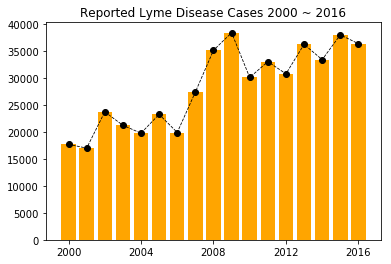

In [4]:
plt.bar(total_by_yr.columns, total_by_yr.loc['total', :], color='orange')
plt.plot(total_by_yr.columns, total_by_yr.loc['total', :], '--ko', linewidth=0.8)
plt.xticks([2000, 2004, 2008, 2012, 2016])
plt.title('Reported Lyme Disease Cases 2000 ~ 2016')
plt.savefig('LD_cases.png', dpi=300)
plt.show()